__Student info:__

- Student name: Thomas Brown
- Student pace: Full Time
- Scheduled project review date/time: TBD
- Instructor name: Abhineet Kulkarni
- Blog post URL: TBD

__Use Case:__<br><br>
The purpose of this project is to start building a neural network model that can determine the sentiment of financial news headlines.  The users of this model would be investment firms who want to keep track of the market sentiment of a set of various products, companies, or industries.  <br><br>
With proper web scraping and feeding of new headlines, a firm would be able to keep track of various topics to make better informed investing decisions.  For example, one could feasibly keep track of terms that are rising rapidly in terms of positive sentiment in order to invest in them.<br><br>
The data is collected from Kaggle through this [link](https://www.kaggle.com/ankurzing/sentiment-analysis-for-financial-news).  It's a collection of 4,837 unique news headlines from various financial news sources. 

## Importing Libraries:

In [1]:
import pandas as pd
import numpy as np

# Scikit-Learn:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score
from sklearn import svm
from sklearn import tree
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder


# Keras:
import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import StandardScaler, LabelBinarizer
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Dense, Conv1D, MaxPool1D, Flatten, Dropout
from keras.utils import to_categorical
from keras.layers import Embedding, LSTM, Dense, Dropout
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout
from keras.initializers import Constant
from keras.optimizers import Adam
from keras.layers import GlobalAveragePooling1D
from keras.callbacks import EarlyStopping



# NLTK - Stopwords:
import nltk
from nltk.corpus import stopwords
import string
from nltk import word_tokenize, FreqDist
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag
from nltk.corpus import wordnet


# Sampling:
from imblearn.over_sampling import SMOTE, ADASYN

# XGBoost:
import xgboost as xgb

# Plots and Graphs:
from wordcloud import WordCloud
import seaborn as sns
sns.set_style('darkgrid')
import matplotlib.pyplot as plt
import plotly.express as px
import scikitplot as skplt 
%matplotlib inline

# Other:
from collections import Counter
import warnings
warnings.filterwarnings('ignore')
# So we can see the entire column:
pd.set_option('display.max_colwidth', -1)

Using TensorFlow backend.
/Users/Thomas/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


# Importing Data:

In [2]:
df = pd.read_csv('all-data.csv', names = ['Sentiment', 'Headline'], 
                 encoding='latin-1')
df = df.sample(frac=1).reset_index(drop=True) # Shuffling the data in case there's an ordering bias
display(df.head())
print("Shape:", df.shape, "\n\n")
print(df.info())

Sentiment  \
0  neutral    
1  neutral    
2  neutral    
3  positive   
4  neutral    

                                                                                                                                                                                                      Headline  
0  Boomeranger Boats Oy specialises in boat building and designs , manufactures and sells customised Rigid Inflatable Boats RIB primarily for the Baltic Sea market .                                           
1  `` Thanks to my Nokia and Lulu , I am now proud to be a published His novel can be found here .                                                                                                              
2  The company will try to adapt the operations through temporary lay-offs of different duration , working hour arrangements , training and development efforts .                                               
3  Finnish lifting equipment maker Kone Oyj said on October 4 , 2007 it won an order worth 15 mln euro $ 21.2 mln to deliver a total of 53 custom designed elevators to Norwegian shipbuilder Aker Yards ASA .  
4  The issuer is solely responsible for the content of this announcement .

Shape: (4846, 2) 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4846 entries, 0 to 4845
Data columns (total 2 columns):
Sentiment    4846 non-null object
Headline     4846 non-null object
dtypes: object(2)
memory usage: 75.8+ KB
None


In [3]:
# Let's take a look at the number of instances of each sentiment:
df.Sentiment.value_counts()
# Not too many negatives.  This may prove to be an issue later on, but for now, let's keep moving.

neutral     2879
positive    1363
negative    604 
Name: Sentiment, dtype: int64

# Cleaning Data:

First, the labels need to be changed to numerical values in order to go through the neural network later on. Due to a low number of negative articles compared to the rest, I'll be treating this as a binary problem: 'Positive' vs 'Not Positive'.

- 0 is Negative or Neutral
- 1 is Positive

In [4]:
# BINARY
df['Sentiment'] = df['Sentiment'].map(lambda x: 1 if x == 'positive' else 0)
df.head()

Sentiment  \
0  0           
1  0           
2  0           
3  1           
4  0           

                                                                                                                                                                                                      Headline  
0  Boomeranger Boats Oy specialises in boat building and designs , manufactures and sells customised Rigid Inflatable Boats RIB primarily for the Baltic Sea market .                                           
1  `` Thanks to my Nokia and Lulu , I am now proud to be a published His novel can be found here .                                                                                                              
2  The company will try to adapt the operations through temporary lay-offs of different duration , working hour arrangements , training and development efforts .                                               
3  Finnish lifting equipment maker Kone Oyj said on October 4 , 2007 it won an order worth 15 mln euro $ 21.2 mln to deliver a total of 53 custom designed elevators to Norwegian shipbuilder Aker Yards ASA .  
4  The issuer is solely responsible for the content of this announcement .

## Stopwords:

Next, we can remove all the 'stopwords' that can clog up the system later on.  The punctuation will get filtered out later.

In [5]:
stop = set(stopwords.words('english'))
stop.add("'s")
def remove_stopwords(text):
    text = [word.lower() for word in text.split() if word.lower() not in stop]
    return " ".join(text)

df['Headline'] = df['Headline'].map(remove_stopwords)

In [6]:
df.head()

Sentiment  \
0  0           
1  0           
2  0           
3  1           
4  0           

                                                                                                                                                                              Headline  
0  boomeranger boats oy specialises boat building designs , manufactures sells customised rigid inflatable boats rib primarily baltic sea market .                                      
1  `` thanks nokia lulu , proud published novel found .                                                                                                                                 
2  company try adapt operations temporary lay-offs different duration , working hour arrangements , training development efforts .                                                      
3  finnish lifting equipment maker kone oyj said october 4 , 2007 order worth 15 mln euro $ 21.2 mln deliver total 53 custom designed elevators norwegian shipbuilder aker yards asa .  
4  issuer solely responsible content announcement .

## Lemmatization:

In [7]:
def get_wordnet_pos(word):
    """Map POS tag to first character lemmatize() accepts"""
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}

    return tag_dict.get(tag, wordnet.NOUN)

In [8]:
wordnet_lemmatizer = WordNetLemmatizer()

def lemmatize(text):
    text = [wordnet_lemmatizer.lemmatize(word, get_wordnet_pos(word)) for word in text.split()]
    return " ".join(text)

df['Headline'] = df['Headline'].map(lemmatize)

In [9]:
# Still looking good
df.head()

Sentiment  \
0  0           
1  0           
2  0           
3  1           
4  0           

                                                                                                                                                                      Headline  
0  boomeranger boat oy specialises boat building design , manufacture sell customise rigid inflatable boat rib primarily baltic sea market .                                    
1  `` thanks nokia lulu , proud publish novel found .                                                                                                                           
2  company try adapt operation temporary lay-offs different duration , work hour arrangement , training development effort .                                                    
3  finnish lift equipment maker kone oyj say october 4 , 2007 order worth 15 mln euro $ 21.2 mln deliver total 53 custom design elevator norwegian shipbuilder aker yard asa .  
4  issuer solely responsible content announcement .

# EDA:

In [87]:
# Let's start by exploring sentence length vs sentiment:
df_eda = pd.read_csv('all-data.csv', names = ['Sentiment', 'Headline'], 
                     encoding='latin-1')
df_eda = df_eda.sample(frac=1).reset_index(drop=True) # Shuffling the data in case there's an ordering bias
df_eda['Sentiment'] = df_eda['Sentiment'].map(lambda x: 'positive' if x == 'positive' else 'neutral/neg')
# Same dataset as before:

In [88]:
sent_len = []
for row in df_eda.Headline:
    x = (len(row.split()))
    sent_len.append(x)
    
df_eda['Sentence_Length'] = sent_len

In [89]:
df_eda.head()

Sentiment  \
0  neutral/neg   
1  positive      
2  positive      
3  positive      
4  positive      

                                                                                                                                                                                            Headline  \
0  Market share decreased on the route between Helsinki in Finland and Tallinn in Estonia by 0.1 percentage points to 24.8 % .                                                                         
1  Due to rapid expansion , the market share of Tallink in terms of passenger carriage through Tallinna Sadam Port of Tallinn totaled 55 percent in November against 45.7 percent in November 2005 .   
2  At the end of March 2007 , the group 's order book was at EUR 39.6 mn , up 42 % from the corresponding period in 2006 .                                                                             
3  He believes that the soy-oats have a good chance of entering the UK market .                                                                                                                        
4  Under the agreement , TietoEnator will provide Blyk with extended application and business process management services and an IT infrastructure .                                                   

   Sentence_Length  
0  22               
1  33               
2  28               
3  15               
4  21

In [96]:
import seaborn as sns

In [97]:
sns.displot(df_eda.Sentence_Length)

AttributeError: module 'seaborn' has no attribute 'displot'

Let's explore some word clouds to see the most commonly occurring words for each label.

In [10]:
# Separating out the categories
pos = df.Headline[df.Sentiment[df.Sentiment== 1].index]
neg = df.Headline[df.Sentiment[df.Sentiment== 0].index]

In [11]:
 def wordcloud(dataset):
    plt.figure(figsize = (18,24)) # Text Reviews with positive Ratings
    wordcloud = WordCloud(min_font_size = 3,  max_words = 2500 , width = 1200 , height = 800).generate(" ".join(dataset))
    plt.imshow(wordcloud,interpolation = 'bilinear')
    plt.axis("off")
    plt.tight_layout(pad=0)
    plt.show();

def show_wordclouds():
    print ('Positive Sentiment Wordcloud:')
    wordcloud(pos)
    ###
    print ('Negative Sentiment Wordcloud:')
    wordcloud(neg)
    ###
    

Positive Sentiment Wordcloud:


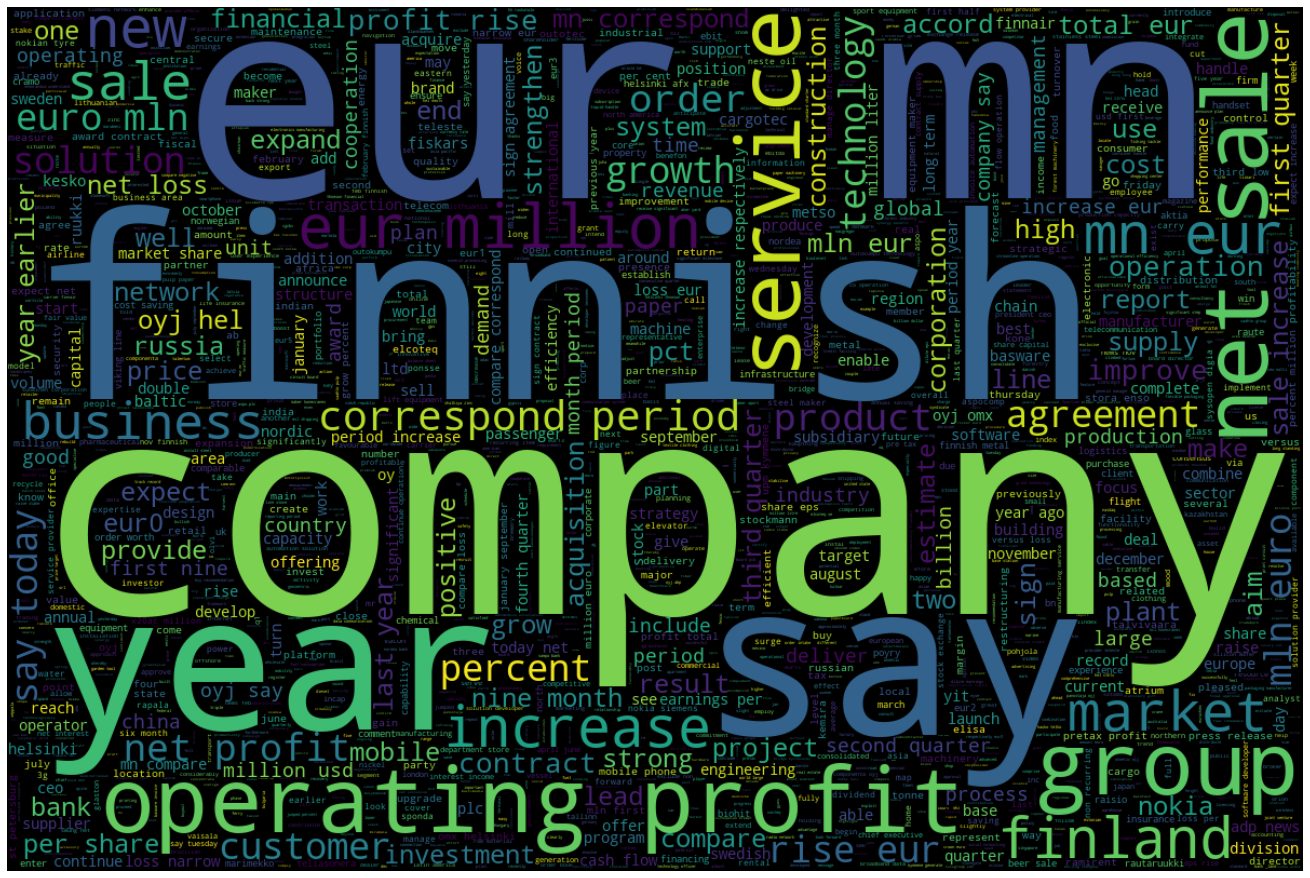

Negative Sentiment Wordcloud:


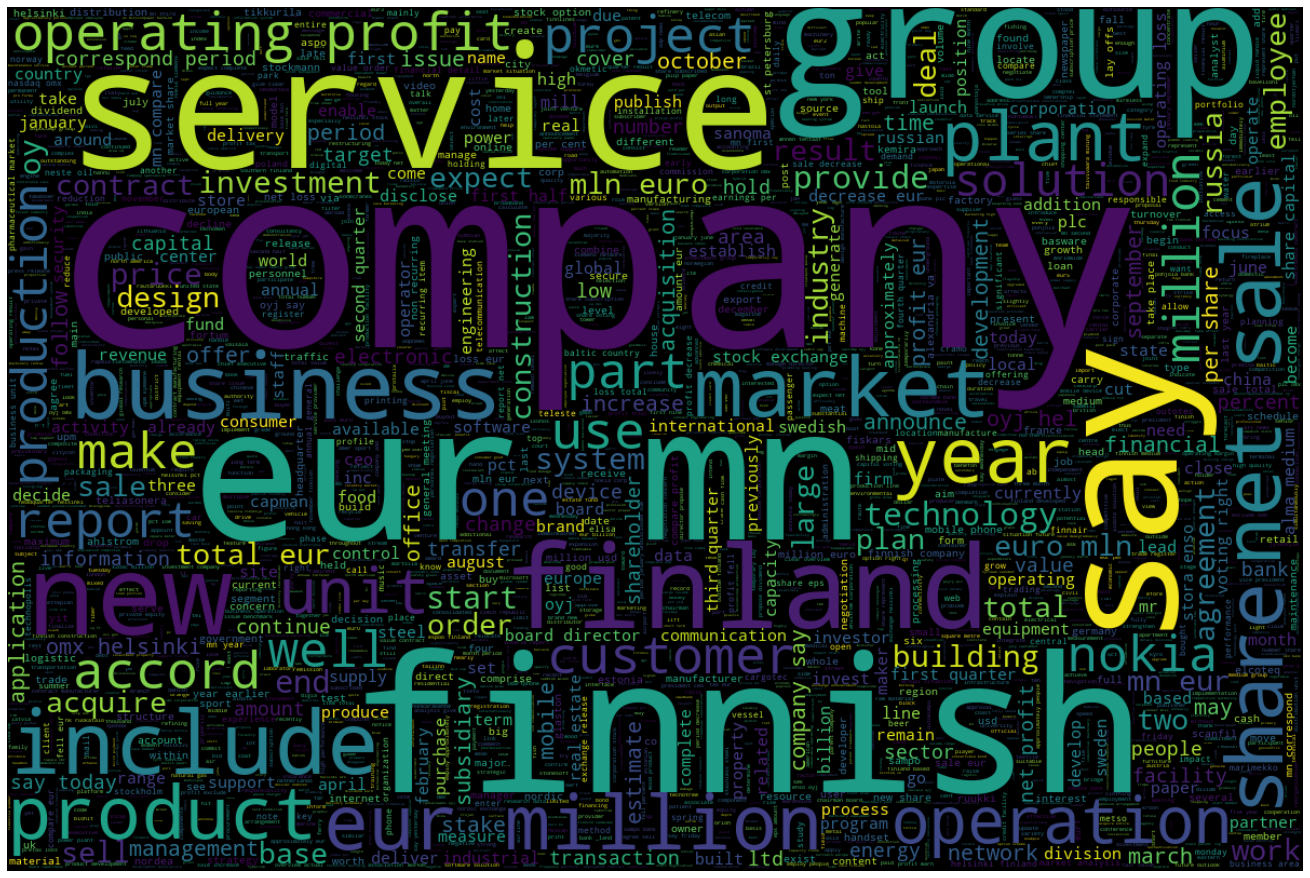

In [12]:
# Showing Word Clounds
show_wordclouds()

Not too much useful information here.  There are some more words we can clean, but I would like to stay on the conservative side for now.

# Additional Cleaning:

As we saw above, there are a few words that are quite common that occur in all 3 labels.  We'll add this to these to the stop word list and run the headlines through the filter again:
- 'finnish'
- 'say'
- 'company'
I'm leaving in 'eur' for now as it doesn't appear heavily in the 'Neutral' category.  This may help later on.  Depending on how the neural network performs later, I may or may not activate the following cells.

In [13]:
# Taking out a few more stop words:
stop.add("finnish")
stop.add("say")
stop.add("company")

df['Headline'] = df['Headline'].map(remove_stopwords)

In [14]:
# Starting to feel a little like caveman speak, but hopefully this will be easier for the model to read!
df.head()

Sentiment  \
0  0           
1  0           
2  0           
3  1           
4  0           

                                                                                                                                                          Headline  
0  boomeranger boat oy specialises boat building design , manufacture sell customise rigid inflatable boat rib primarily baltic sea market .                        
1  `` thanks nokia lulu , proud publish novel found .                                                                                                               
2  try adapt operation temporary lay-offs different duration , work hour arrangement , training development effort .                                                
3  lift equipment maker kone oyj october 4 , 2007 order worth 15 mln euro $ 21.2 mln deliver total 53 custom design elevator norwegian shipbuilder aker yard asa .  
4  issuer solely responsible content announcement .

In [15]:
pos = df.Headline[df.Sentiment[df.Sentiment== 1].index]
neg = df.Headline[df.Sentiment[df.Sentiment== 0].index]


Positive Sentiment Wordcloud:


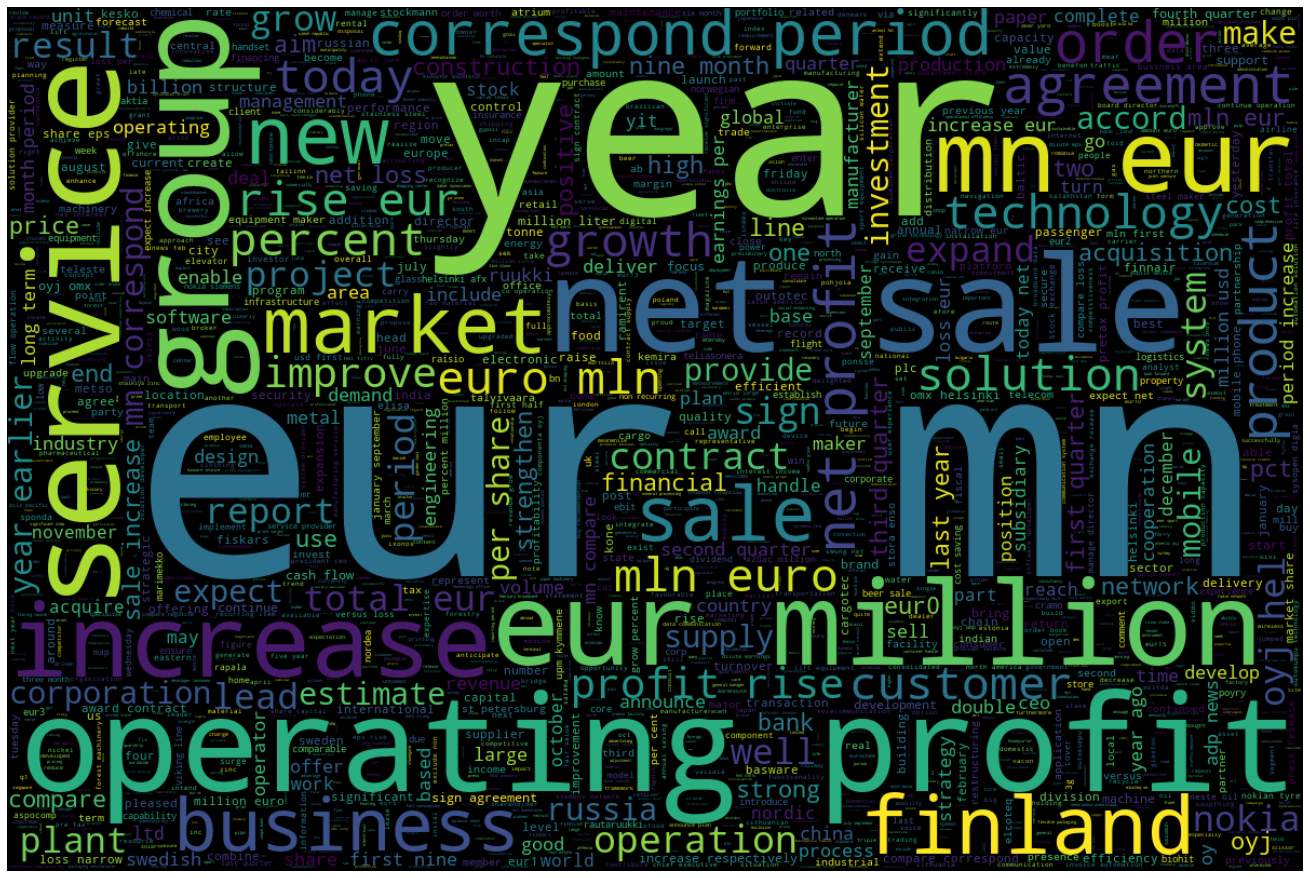

Negative Sentiment Wordcloud:


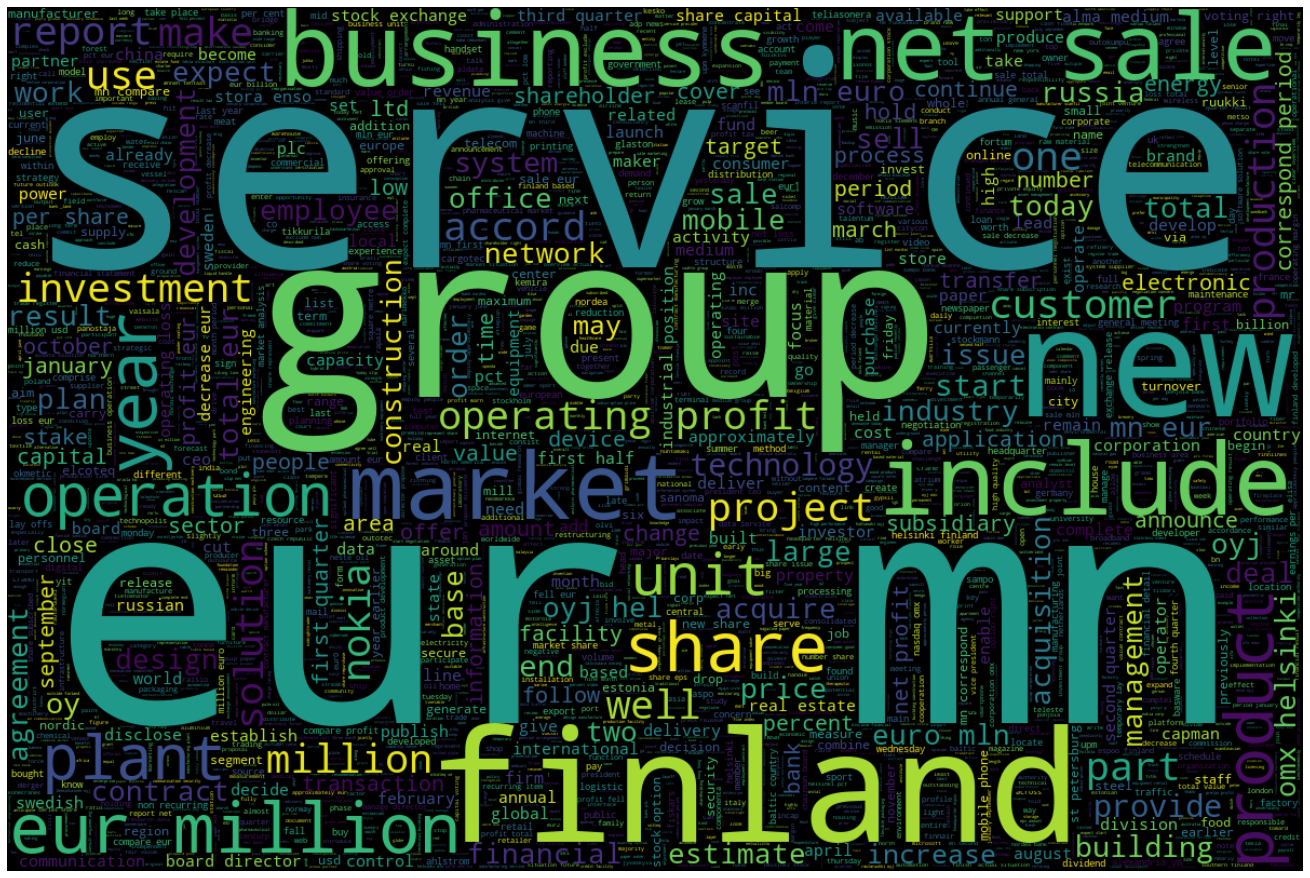

In [16]:
# Showing Word Clounds with additional words removed
show_wordclouds()

# Counter:

In [17]:
def counter_word(text):
    count = Counter()
    for i in text.values:
        for word in i.split():
            count[word] += 1
    return count

In [18]:
text = df.Headline
counter = counter_word(text)

In [19]:
len(counter)

10094

In [20]:
# showing the first 25 rows of the counter
n = 25
out = dict(list(counter.items())[0: n])  
out

{'boomeranger': 2,
 'boat': 8,
 'oy': 97,
 'specialises': 6,
 'building': 96,
 'design': 80,
 ',': 4662,
 'manufacture': 36,
 'sell': 91,
 'customise': 4,
 'rigid': 3,
 'inflatable': 1,
 'rib': 1,
 'primarily': 7,
 'baltic': 47,
 'sea': 15,
 'market': 288,
 '.': 4780,
 '``': 254,
 'thanks': 9,
 'nokia': 139,
 'lulu': 1,
 'proud': 7,
 'publish': 36,
 'novel': 7}

In [21]:
num_words = len(counter)

# Train/Test Split:

In [22]:
# Generating the lists of headlines and labels
headlines = []
labels = []

for row in range(len(df)):
    headlines.append(df['Headline'][row])
    labels.append(df['Sentiment'][row])

In [23]:
# Setting the training ratio
training_size = int(df.shape[0] * .8) # Out of 4846

In [24]:
# Train Test Split:
training_headlines = headlines[0:training_size]
testing_headlines = headlines[training_size:]
training_labels = labels[0:training_size]
testing_labels = labels[training_size:]

In [25]:
# Looks good
display(training_headlines[:3])
display(training_labels[:3])

['boomeranger boat oy specialises boat building design , manufacture sell customise rigid inflatable boat rib primarily baltic sea market .',
 '`` thanks nokia lulu , proud publish novel found .',
 'try adapt operation temporary lay-offs different duration , work hour arrangement , training development effort .']

[0, 0, 0]

# Tokenization:

In [26]:
vocab_size = len(counter) # approx 1/5 of the words 
embedding_dim = 32
max_length = 50
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"

In [27]:

# Initializing the fitting the tokenizer:
tokenizer = Tokenizer(num_words = vocab_size, oov_token = oov_tok)
tokenizer.fit_on_texts(training_headlines)
# Initializing the Word Index:
word_index = tokenizer.word_index
# Padding and Sequencing the Training Set:
training_sequences = tokenizer.texts_to_sequences(training_headlines)
training_padded = pad_sequences(training_sequences, maxlen = max_length,
                               padding = padding_type, 
                               truncating = trunc_type)
# Padding and Sequencing the Testing Set:
testing_sequences = tokenizer.texts_to_sequences(testing_headlines)
testing_padded = pad_sequences(testing_sequences, maxlen = max_length, 
                               padding = padding_type, 
                               truncating = trunc_type)


In [28]:
# Switch to Numpy Array
training_padded = np.array(training_padded)
training_labels = np.array(training_labels)
testing_padded = np.array(testing_padded)
testing_labels = np.array(testing_labels)

In [29]:
# Example of what's happening under the hood:
print ('Padded and Tokenized Headline:\n', training_padded[3])
print ('\nThe actual headline:\n', df.Headline[3])
print ('\nLabel:\n', training_labels[3])

Padded and Tokenized Headline:
 [ 828  121  132  647   34  177   19   31   49  506  133   20   35  297
   11   20  165   27 1747 2071  141  829  876 2581 1213 1345 2072    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0]

The actual headline:
 lift equipment maker kone oyj october 4 , 2007 order worth 15 mln euro $ 21.2 mln deliver total 53 custom design elevator norwegian shipbuilder aker yard asa .

Label:
 1


## Taking a Look at Inputs:

In [30]:
# So far looks good:
n = 0

display(training_headlines[n])
print('-----------------')
display(training_padded[n])
print('-----------------')
display(training_labels[n])
print('-----------------')

display(testing_headlines[n])
print('-----------------')
display(testing_padded[n])
print('-----------------')
display(testing_labels[n])
print('-----------------')


'boomeranger boat oy specialises boat building design , manufacture sell customise rigid inflatable boat rib primarily baltic sea market .'

-----------------


array([2579, 1097,  101, 1515, 1097,   93,  141,  360,  120, 1743, 2580,
       3729, 1097, 3730, 1744,  221,  726,   22,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0], dtype=int32)

-----------------


0

-----------------


'power fortum report 89 % electricity generate without carbon dioxide emission 2007 .'

-----------------


array([ 299,  643,   53, 1396,  779,  499,  917, 2820, 4200, 1167,   31,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0], dtype=int32)

-----------------


0

-----------------


In [31]:
# Making sure all our data works. . . 
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_sentence(text):
    return ' '.join([reverse_word_index.get(i, '-') for i in text])

print(decode_sentence(training_padded[1]))
print(training_headlines[1])
print(labels[1])

thanks nokia lulu proud publish novel found - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
`` thanks nokia lulu , proud publish novel found .
0


# Modeling:

## Baseline with Vader:

Vader is a commonly used sentiment analysis toolbox.  Let's see if we can use it as a baseline against the artificial neural network I'll build later on in the notebook.

In [32]:
#nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

In [33]:
# Vader Accuracy:
# Making a new dataframe to mess around in:
df2 = pd.read_csv('all-data.csv', names = ['Sentiment', 'Headline'], 
                 encoding='latin-1')
df2 = df2.sample(frac=1).reset_index(drop=True) # Shuffling the data in case there's an ordering bias
df2['Sentiment'] = df2['Sentiment'].map(lambda x: 1 if x == 'positive' else 0)
df2['vader_sent'] = 0 # Placeholder as 0
df2 = df2[['Sentiment', 'vader_sent', 'Headline']]
df2.head()

Sentiment  vader_sent  \
0  1          0            
1  1          0            
2  0          0            
3  0          0            
4  1          0            

                                                                                                                                                                                                              Headline  
0  The company , which makes garden tools , scissors and other consumer goods , said earnings were boosted by 6.9 mln eur of income it received from its 16.7 pct shareholding in Finnish engineering group Wartsila .  
1  Following the transaction , Lundbeck has worldwide rights for nalmefene , excluding North America , Mexico , Turkey and South-Korea .                                                                                
2  In addition , the contract includes modification of the effluent treatment plant at Follum .                                                                                                                         
3  Short-term licenses for the games cost as little as $ 3 while purchasing a game outright can cost as much as $ 10 or $ 15 .                                                                                          
4  The company also said on November 16 , 2006 its Real Estate Fund I Ky signed an agreement with Finnish window maker Fenestra Oy to build a window plant in Forssa , southern Finland .

In [34]:
# Sanity check:
x = sid.polarity_scores('This is a happy sentence!')
print (x)
print (x['compound'])

{'neg': 0.0, 'neu': 0.274, 'pos': 0.726, 'compound': 0.6476}
0.6476


In [35]:
vader_sent_list = []
for row in df2.Headline:
    x = sid.polarity_scores(row)['compound']
    vader_sent_list.append(x)
    
df2.vader_sent = vader_sent_list
df2.head()
# Looks good, but we'll need to change vader_sent to the same format as Sentiment
# The 'Compound' score we're using uses a scale of -1 to 1, while Sentiment is 0 to 1

Sentiment  vader_sent  \
0  1          0.3612       
1  1          0.0000       
2  0          0.0000       
3  0          0.0000       
4  1          0.4939       

                                                                                                                                                                                                              Headline  
0  The company , which makes garden tools , scissors and other consumer goods , said earnings were boosted by 6.9 mln eur of income it received from its 16.7 pct shareholding in Finnish engineering group Wartsila .  
1  Following the transaction , Lundbeck has worldwide rights for nalmefene , excluding North America , Mexico , Turkey and South-Korea .                                                                                
2  In addition , the contract includes modification of the effluent treatment plant at Follum .                                                                                                                         
3  Short-term licenses for the games cost as little as $ 3 while purchasing a game outright can cost as much as $ 10 or $ 15 .                                                                                          
4  The company also said on November 16 , 2006 its Real Estate Fund I Ky signed an agreement with Finnish window maker Fenestra Oy to build a window plant in Forssa , southern Finland .

In [36]:
# Greater than 50% on the vader compound gets it classified as a 1 i.e. 'positive'
df2['vader_sent'] = df2['vader_sent'].map(lambda x: 1 if x > 0 else 0)
df2.head()

Sentiment  vader_sent  \
0  1          1            
1  1          0            
2  0          0            
3  0          0            
4  1          1            

                                                                                                                                                                                                              Headline  
0  The company , which makes garden tools , scissors and other consumer goods , said earnings were boosted by 6.9 mln eur of income it received from its 16.7 pct shareholding in Finnish engineering group Wartsila .  
1  Following the transaction , Lundbeck has worldwide rights for nalmefene , excluding North America , Mexico , Turkey and South-Korea .                                                                                
2  In addition , the contract includes modification of the effluent treatment plant at Follum .                                                                                                                         
3  Short-term licenses for the games cost as little as $ 3 while purchasing a game outright can cost as much as $ 10 or $ 15 .                                                                                          
4  The company also said on November 16 , 2006 its Real Estate Fund I Ky signed an agreement with Finnish window maker Fenestra Oy to build a window plant in Forssa , southern Finland .

In [37]:
# Score counter for accuracy:
# 1 for match, 0 for no match
df2['vader_sent_match'] = 1 - abs(df2['vader_sent'] - df2['Sentiment'])
df2 = df2[['Sentiment', 'vader_sent', 'vader_sent_match', 'Headline']]
df2.head(10)

Sentiment  vader_sent  vader_sent_match  \
0  1          1           1                  
1  1          0           0                  
2  0          0           1                  
3  0          0           1                  
4  1          1           1                  
5  0          1           0                  
6  0          1           0                  
7  0          1           0                  
8  1          1           1                  
9  1          1           1                  

                                                                                                                                                                                                              Headline  
0  The company , which makes garden tools , scissors and other consumer goods , said earnings were boosted by 6.9 mln eur of income it received from its 16.7 pct shareholding in Finnish engineering group Wartsila .  
1  Following the transaction , Lundbeck has worldwide rights for nalmefene , excluding North America , Mexico , Turkey and South-Korea .                                                                                
2  In addition , the contract includes modification of the effluent treatment plant at Follum .                                                                                                                         
3  Short-term licenses for the games cost as little as $ 3 while purchasing a game outright can cost as much as $ 10 or $ 15 .                                                                                          
4  The company also said on November 16 , 2006 its Real Estate Fund I Ky signed an agreement with Finnish window maker Fenestra Oy to build a window plant in Forssa , southern Finland .                               
5  In sales volume , Coca-Cola 's market share has decreased by 2.2 % to 24.2 % .                                                                                                                                       
6  One of the opportunities would be to bring all Baltic meat processing to Rakvere , like processing was concentrated at the Vantaa meat-packing unit in Finland , the paper wrote .                                   
7  Operating profit decreased to EUR 11.2 mn from EUR 16.6 mn .                                                                                                                                                         
8  ( I&H ) in a move to enhance growth .                                                                                                                                                                                
9  Theodosopoulos said Tellabs could be of value to Nokia Siemens or Nortel given its `` leading supply status '' with Verizon , along with high-growth products .

In [38]:
x = sum(df2['vader_sent_match'])
y = len(df2)
print ('Correct Vader Classifications:', x, 'out of', y)
print ('Percentage Correct:', '{:.2%}'.format(x/y))

Correct Vader Classifications: 3004 out of 4846
Percentage Correct: 61.99%


With the threshold of greater than 50% classified as 'Positive', we got 62% accuracy with Vader.  Let's see if we can do a better job with an artificial neural network.

# Neural Network:

In [39]:
# First let's define the functions for model evaluation
def model_eval(history):
    pd.DataFrame(history.history).plot(figsize = (12,8)) # Was 8, 5 before
    plt.grid(True)
    plt.gca().set_ylim(0, 1)
    plt.show
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

def model_metrics(model):
    train_acc = model.evaluate(training_padded, training_labels, verbose=0)
    test_acc = model.evaluate(testing_padded, testing_labels, verbose=0)
    print('Train Loss:', "{:.3%}".format(train_acc[0]))
    print('Train Accuracy:', "{:.3%}".format(train_acc[1]))
    print('Test Loss:', "{:.3%}".format(test_acc[0]))
    print('Test Accuracy:', "{:.3%}".format(test_acc[1]))
    
def easy_headlines():
    sentence = ["stock rise rapid for tesla", 
                "apple factory shut down, lay off hundred employee",
                "average day of return for microsoft"]
    sequences = tokenizer.texts_to_sequences(sentence)
    padded = pad_sequences(sequences, maxlen=max_length, 
                           padding=padding_type, 
                           truncating=trunc_type)
    for headline in sentence:    
        print (headline)
    print(model.predict(padded))
    
def harder_headlines():
    sentence = ["snowflake more  double  debut  wall street embrace tech ipos", 
                "europe economic revival imperil raising the specter grind downturn",
                "fed debate next step after shifting approach to rate setting"]
    sequences = tokenizer.texts_to_sequences(sentence)
    padded = pad_sequences(sequences, maxlen=max_length, 
                           padding=padding_type, 
                           truncating=trunc_type)
    for headline in sentence:    
        print (headline)
    print(model.predict(padded))

    
def test_headlines():
    print('Easier Headlines:')
    easy_headlines()
    print ('\n')
    print ('Realistic Headlines:')
    harder_headlines()

Now it's time to build a baseline neural network:

## Model 1 (1 Hidden Layer):

In [40]:
model = Sequential()
model.add(Embedding(vocab_size, embedding_dim, input_length=max_length))
model.add(GlobalAveragePooling1D())
model.add(Dense(200, activation='relu'))
model.add(Dropout(0.2)) # Optional Regularization
#model.add(Dense(150, activation='relu')) # Optional second hidden layer
#model.add(Dropout(0.2)) # Optional Regularization
model.add(Dense(1, activation='sigmoid'))

#model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy']) # Orig code

#Messing with learning rate
opt = keras.optimizers.Adam(lr=0.0001)
model.compile(loss='binary_crossentropy',optimizer= opt, 
              metrics=['accuracy']) # Orig code

In [41]:
num_epochs = 50
# patient early stopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
history = model.fit(training_padded, training_labels, 
                    epochs=num_epochs,
                    batch_size = 10,
                    validation_data=(testing_padded, testing_labels), 
                    verbose= 1, callbacks=[es])

Train on 3876 samples, validate on 970 samples
Epoch 1/50
3876/3876 [==============================] - 2s 482us/step - loss: 0.6476 - acc: 0.7025 - val_loss: 0.5861 - val_acc: 0.7485
Epoch 2/50
3876/3876 [==============================] - 2s 457us/step - loss: 0.5973 - acc: 0.7113 - val_loss: 0.5597 - val_acc: 0.7485
Epoch 3/50
3876/3876 [==============================] - 2s 428us/step - loss: 0.5913 - acc: 0.7113 - val_loss: 0.5575 - val_acc: 0.7485
Epoch 4/50
3876/3876 [==============================] - 2s 462us/step - loss: 0.5872 - acc: 0.7113 - val_loss: 0.5525 - val_acc: 0.7485
Epoch 5/50
3876/3876 [==============================] - 2s 442us/step - loss: 0.5833 - acc: 0.7113 - val_loss: 0.5515 - val_acc: 0.7485
Epoch 6/50
3876/3876 [==============================] - 2s 416us/step - loss: 0.5769 - acc: 0.7116 - val_loss: 0.5451 - val_acc: 0.7474
Epoch 7/50
3876/3876 [==============================] - 2s 402us/step - loss: 0.5663 - acc: 0.7118 - val_loss: 0.5375 - val_acc: 0.7485
E

### Model Evaluation:

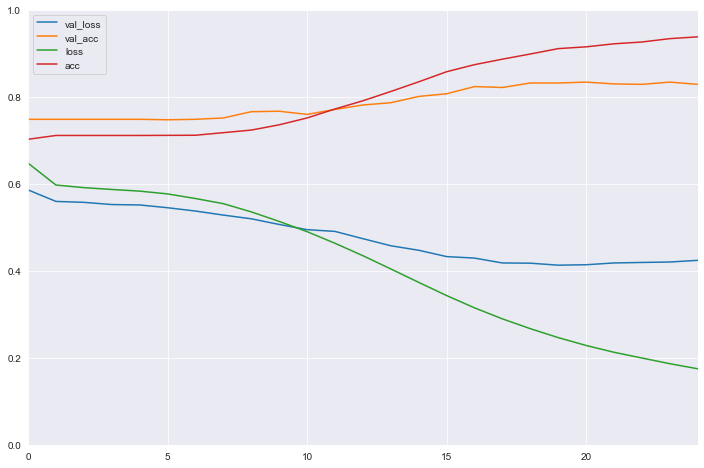

In [42]:
model_eval(history)

In [43]:
model_metrics(model)

Train Loss: 16.369%
Train Accuracy: 94.505%
Test Loss: 42.415%
Test Accuracy: 82.887%


In [44]:
test_headlines()

Easier Headlines:
stock rise rapid for tesla
apple factory shut down, lay off hundred employee
average day of return for microsoft
[[0.76315194]
 [0.01014708]
 [0.44406658]]


Realistic Headlines:
snowflake more  double  debut  wall street embrace tech ipos
europe economic revival imperil raising the specter grind downturn
fed debate next step after shifting approach to rate setting
[[0.2373167 ]
 [0.16671512]
 [0.25843698]]


## Model 2 (2 Hidden Layers):

In [45]:
model = Sequential()
model.add(Embedding(vocab_size, embedding_dim, input_length=max_length))
model.add(GlobalAveragePooling1D())
model.add(Dense(50, activation='relu'))
model.add(Dropout(0.2)) # Optional Regularization
model.add(Dense(50, activation='relu')) # Optional second hidden layer
model.add(Dropout(0.2)) # Optional Regularization
model.add(Dense(1, activation='sigmoid'))

#model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy']) # Orig code

#Messing with learning rate
opt = keras.optimizers.Adam(lr=0.0001)
model.compile(loss='binary_crossentropy',optimizer= opt, 
              metrics=['accuracy']) # Orig code


In [46]:
num_epochs = 50
# patient early stopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
history = model.fit(training_padded, training_labels, 
                    epochs=num_epochs,
                    batch_size = 10,
                    validation_data=(testing_padded, testing_labels), 
                    verbose= 1, callbacks=[es])

Train on 3876 samples, validate on 970 samples
Epoch 1/50
3876/3876 [==============================] - 2s 539us/step - loss: 0.6563 - acc: 0.7061 - val_loss: 0.5913 - val_acc: 0.7485
Epoch 2/50
3876/3876 [==============================] - 2s 447us/step - loss: 0.6000 - acc: 0.7113 - val_loss: 0.5613 - val_acc: 0.7485
Epoch 3/50
3876/3876 [==============================] - 2s 450us/step - loss: 0.5933 - acc: 0.7113 - val_loss: 0.5572 - val_acc: 0.7485
Epoch 4/50
3876/3876 [==============================] - 2s 456us/step - loss: 0.5898 - acc: 0.7113 - val_loss: 0.5569 - val_acc: 0.7485
Epoch 5/50
3876/3876 [==============================] - 2s 430us/step - loss: 0.5845 - acc: 0.7113 - val_loss: 0.5495 - val_acc: 0.7485
Epoch 6/50
3876/3876 [==============================] - 2s 442us/step - loss: 0.5801 - acc: 0.7113 - val_loss: 0.5461 - val_acc: 0.7485
Epoch 7/50
3876/3876 [==============================] - 2s 440us/step - loss: 0.5687 - acc: 0.7113 - val_loss: 0.5411 - val_acc: 0.7485
E

### Model Evaluation:

In [47]:
model_metrics(model)

Train Loss: 13.659%
Train Accuracy: 95.640%
Test Loss: 44.116%
Test Accuracy: 82.577%


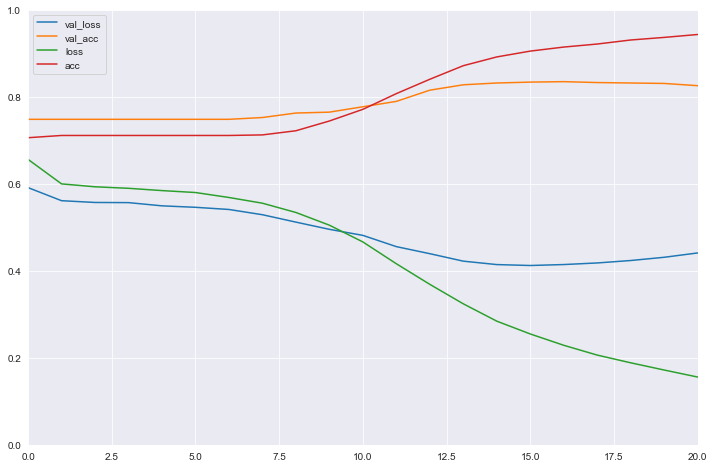

In [48]:
model_eval(history)

In [49]:
test_headlines()

Easier Headlines:
stock rise rapid for tesla
apple factory shut down, lay off hundred employee
average day of return for microsoft
[[0.8155297 ]
 [0.0043682 ]
 [0.48451662]]


Realistic Headlines:
snowflake more  double  debut  wall street embrace tech ipos
europe economic revival imperil raising the specter grind downturn
fed debate next step after shifting approach to rate setting
[[0.20183839]
 [0.15481819]
 [0.21763349]]


## Model 3 (LSTM):

LSTM (Long Short Term Memory) models are quite popular as well for NLP.  Let's give it a try.

In [50]:
model = Sequential()
model.add(Embedding(vocab_size, embedding_dim, input_length=max_length))
model.add(LSTM(64, dropout = 0.1))
model.add(Dense(35, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy']) # Orig code

In [51]:
num_epochs = 50
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
history = model.fit(training_padded, training_labels, 
                    epochs=num_epochs,
                    batch_size = 24,
                    validation_data=(testing_padded, testing_labels), 
                    verbose= 1, callbacks = [es])

Train on 3876 samples, validate on 970 samples
Epoch 1/50
3876/3876 [==============================] - 11s 3ms/step - loss: 0.6071 - acc: 0.7100 - val_loss: 0.5673 - val_acc: 0.7485
Epoch 2/50
3876/3876 [==============================] - 10s 3ms/step - loss: 0.6036 - acc: 0.7113 - val_loss: 0.5677 - val_acc: 0.7485
Epoch 3/50
3876/3876 [==============================] - 10s 3ms/step - loss: 0.5510 - acc: 0.7348 - val_loss: 0.4852 - val_acc: 0.7918
Epoch 4/50
3876/3876 [==============================] - 10s 3ms/step - loss: 0.4622 - acc: 0.7490 - val_loss: 0.5615 - val_acc: 0.7485
Epoch 5/50
3876/3876 [==============================] - 11s 3ms/step - loss: 0.4482 - acc: 0.7190 - val_loss: 0.5101 - val_acc: 0.7474
Epoch 6/50
3876/3876 [==============================] - 10s 3ms/step - loss: 0.4108 - acc: 0.8106 - val_loss: 0.4768 - val_acc: 0.7959
Epoch 7/50
3876/3876 [==============================] - 10s 3ms/step - loss: 0.2960 - acc: 0.8860 - val_loss: 0.4445 - val_acc: 0.8072
Epoch 8/

### Model Evaluation:

In [52]:
model_metrics(model)

Train Loss: 4.596%
Train Accuracy: 98.942%
Test Loss: 81.456%
Test Accuracy: 79.897%


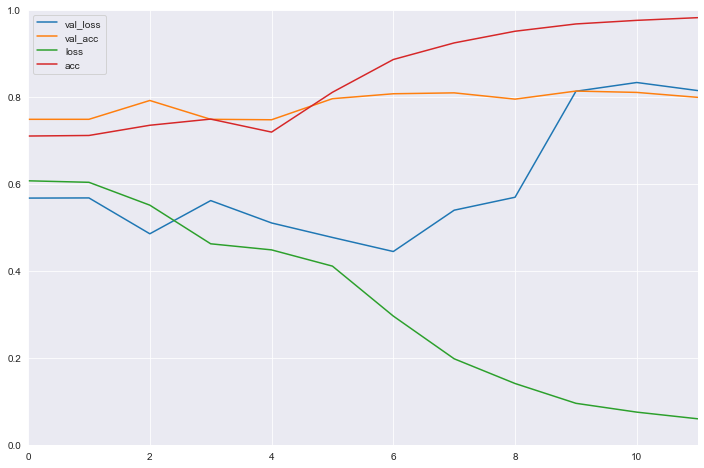

In [53]:
model_eval(history)

In [54]:
test_headlines()

Easier Headlines:
stock rise rapid for tesla
apple factory shut down, lay off hundred employee
average day of return for microsoft
[[0.98052096]
 [0.00259086]
 [0.98040384]]


Realistic Headlines:
snowflake more  double  debut  wall street embrace tech ipos
europe economic revival imperil raising the specter grind downturn
fed debate next step after shifting approach to rate setting
[[0.96920985]
 [0.00407402]
 [0.00315974]]


## Transfer Learning with GloVe:

[Source](https://machinelearningmastery.com/use-word-embedding-layers-deep-learning-keras/)

Now, I'll be trying out a pre-trained model called GloVe to prime the embedding layer of this project.  Let's see if we can get better results with this network.

In [55]:
from numpy import array
from numpy import asarray
from numpy import zeros

In [56]:
f = open('/Users/Thomas/Desktop/glove.6B/glove.6B.50d.txt')  
# Enormous download for this file.  
# If you're interested in replicating this code, you can download it yourself 
# And replace the path in this cell

In [57]:
embeddings_index = dict()

In [58]:
for line in f:
    values = line.split()
    word = values[0]
    coefs = asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

In [59]:
print('Loaded %s word vectors.' % len(embeddings_index))
# Should be enough. . . 

Loaded 400000 word vectors.


In [60]:
# create a weight matrix for words in training docs
embedding_matrix = zeros((vocab_size, 50)) # CHANGING TO 50 DIMENSIONS FROM 100
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

In [61]:
model = Sequential()
e = Embedding(vocab_size, 50, weights = [embedding_matrix], 
              input_length = max_length, 
              trainable=False)

model.add(e)
model.add(Flatten())
model.add(Dense(200, activation='relu')) # TB Test
model.add(Dense(1, activation='sigmoid'))
# compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# summarize the model
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 50, 50)            504700    
_________________________________________________________________
flatten_1 (Flatten)          (None, 2500)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 200)               500200    
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 201       
Total params: 1,005,101
Trainable params: 500,401
Non-trainable params: 504,700
_________________________________________________________________
None


In [62]:
num_epochs = 100
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)
history = model.fit(training_padded, training_labels, 
                    epochs=num_epochs, 
                    validation_data=(testing_padded, testing_labels), 
                    verbose= 1, callbacks = [es])

Train on 3876 samples, validate on 970 samples
Epoch 1/100
3876/3876 [==============================] - 1s 363us/step - loss: 0.5920 - acc: 0.7059 - val_loss: 0.5231 - val_acc: 0.7577
Epoch 2/100
3876/3876 [==============================] - 1s 274us/step - loss: 0.4233 - acc: 0.8142 - val_loss: 0.5148 - val_acc: 0.7557
Epoch 3/100
3876/3876 [==============================] - 1s 261us/step - loss: 0.3127 - acc: 0.8723 - val_loss: 0.5634 - val_acc: 0.7495
Epoch 4/100
3876/3876 [==============================] - 1s 246us/step - loss: 0.2099 - acc: 0.9265 - val_loss: 0.6193 - val_acc: 0.7474
Epoch 5/100
3876/3876 [==============================] - 1s 249us/step - loss: 0.1390 - acc: 0.9628 - val_loss: 0.6442 - val_acc: 0.7402
Epoch 6/100
3876/3876 [==============================] - 1s 248us/step - loss: 0.0954 - acc: 0.9781 - val_loss: 0.7381 - val_acc: 0.7320
Epoch 7/100
3876/3876 [==============================] - 1s 249us/step - loss: 0.0664 - acc: 0.9881 - val_loss: 0.7609 - val_acc: 0

### Model Evaluation:

In [63]:
model_metrics(model)

Train Loss: 3.304%
Train Accuracy: 99.484%
Test Loss: 102.123%
Test Accuracy: 72.577%


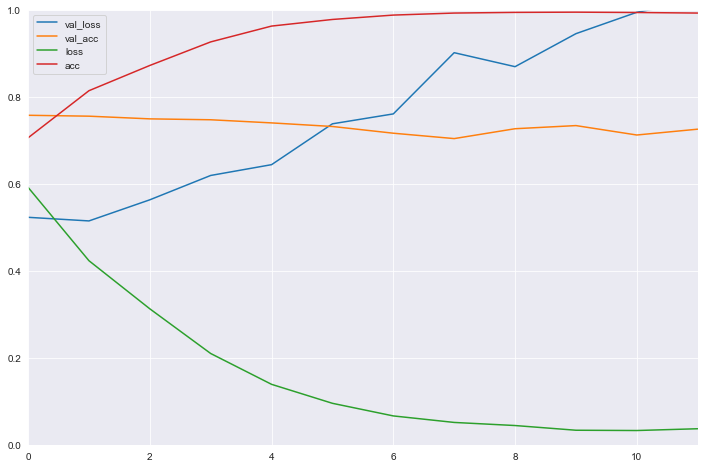

In [64]:
model_eval(history)

In [65]:
test_headlines()

Easier Headlines:
stock rise rapid for tesla
apple factory shut down, lay off hundred employee
average day of return for microsoft
[[8.9194387e-01]
 [7.9129364e-05]
 [3.1170927e-03]]


Realistic Headlines:
snowflake more  double  debut  wall street embrace tech ipos
europe economic revival imperil raising the specter grind downturn
fed debate next step after shifting approach to rate setting
[[0.14282264]
 [0.7372223 ]
 [0.52989644]]


Surprisingly, I did not get great performance with this model.  The original embedded layer model worked best.

## Embedding Dimensions:

With the following code, I can download the embedding vectors weights and metadata in order to upload to TensorFlow Projector.  The website is found [here](https://projector.tensorflow.org/), and if you un-comment the following code, run it, download the files, upload them to the projector, and click 'spherize data' you can see the embeddings from the neural network.

An example of this can be found in the gif in the readme file.

In [66]:
'''
e = model.layers[0]
weights = e.get_weights()[0]
print(weights.shape) # shape: (vocab_size, embedding_dim)

import io

out_v = io.open('vecs.tsv', 'w', encoding='utf-8')
out_m = io.open('meta.tsv', 'w', encoding='utf-8')
for word_num in range(1, vocab_size):
  word = reverse_word_index[word_num]
  embeddings = weights[word_num]
  out_m.write(word + "\n")
  out_v.write('\t'.join([str(x) for x in embeddings]) + "\n")
out_v.close()
out_m.close()
'''

'\ne = model.layers[0]\nweights = e.get_weights()[0]\nprint(weights.shape) # shape: (vocab_size, embedding_dim)\n\nimport io\n\nout_v = io.open(\'vecs.tsv\', \'w\', encoding=\'utf-8\')\nout_m = io.open(\'meta.tsv\', \'w\', encoding=\'utf-8\')\nfor word_num in range(1, vocab_size):\n  word = reverse_word_index[word_num]\n  embeddings = weights[word_num]\n  out_m.write(word + "\n")\n  out_v.write(\'\t\'.join([str(x) for x in embeddings]) + "\n")\nout_v.close()\nout_m.close()\n'

# Further Work:

In the future, I'd like to complete the following analysis:
- A web application that collects and analyzes headlines from various financial news sources.
- Other neural network architecture types.
- New types of sentiment analysis, such as breaking news vs an opinion piece on an older issue.
- Rate different newspapers by sentiment value.

# Conclusion:

If I were to put this into production, I would use the first embedded layer model and train it with quite a bit more data.  It would be a challenge to collect, but the model would be able to gain quite a bit more accuracy.  In the end, though, I believe it would ultimately be worth it.

This was a fun challenge.  Sentiment analysis is a fairly tried and true field of study, but it was a bit more of a challenge to try it with financial news headlines.  The words that impart sentiment tend to be much different than those in (for example) Amazon reviews or other common test cases.  

While 80% accuracy has some definite room for improvement, it's not a bad start considering the amount of labeled data that was available for this project.  At some point, I'd love to come back to this with a larger dataset and more experience under my belt working with neural networks and take another crack at this project.

Thanks for reading, and let me know if you have any questions.

-Thomas